# TD 2: simulateur à événements discrets

---

## 1. Un premier simulateur


On considère un *serveur* avec une *file d'attente* de capacité infinie. Les clients sont servis par ordre d'arrivée, et dès que le serveur est libéré il commence à servir le client suivant s'il y en a un dans la file. 

Le temps de service et le délai entre 2 arrivées de clients sont des variable aléatoires suivant une loi exponentielle de paramètre 1 et $\lambda$ respectivement, où $\lambda > 0$ est un paramètre du modèle qui peut s'interpréter comme le débit de clients, c'est-à-dire le nombre moyen de clients qui arrivent par unité de temps. 


Dans la cellule suivante, on importe les librairies utiles pour écrire le simulateur et on définit la fonction ```duree_exp(p)``` qui génère une variable aléatoire exponentielle de paramètre $p$. Exécuter cette cellule pour pouvoir utiliser ces librairies et cette fonction dans le reste du notebook.


In [1]:
import random as rd
import seaborn as sns
import numpy as np
from heapq import heappush, heappop

def duree_exp(p):
    return np.random.exponential(1/p)

On donne le code du simulateur à événements discrets qui simule la file d'attente. On affiche ensuite l'évolution au cours du temps de simulation du nombre de clients dans la file.


* exécuter et comprendre le code fourni

* combien y a-t'il d'événements au maximum dans l'échéancier? 

In [2]:
# les constantes
T_MAX = 50 # temps max de simulation

def simul_file(lam):
    """ simule la file d'attente en fonction du taux d'arrivée lam
    retourne les statistiques mesurées"""

    # les variables
    t = 0 # temps
    n = 0 # nombre de clients à chaque date
    echeancier = [] # contient les événements à venir
    # On initialise l'échéancier en ajoutant un client
    heappush(echeancier, (0,"client"))
    # evolution du nombre de clients au cours du temps
    n_t = [] 
    
    # boucle principale
    while t < T_MAX:
        # on récupère les données à afficher
        n_t.append([t, n])
        # on extrait l'événement le plus proche dans le temps
        evt = heappop(echeancier)
        # on met à jour la date
        t = evt[0]
        # on traite l'événement
        match evt[1]:
            case "service":
                # un client part
                n -= 1
                # si il reste un client, il commence son service
                if n > 0:
                    heappush(echeancier, (t + duree_exp(1), "service"))
            case "client":
                # on calcule la date d'arrivée du prochain client
                heappush(echeancier, (t + duree_exp(lam), "client"))
                n += 1
                # si la file était vide, on commence un service
                if n == 1:
                    heappush(echeancier, (t + duree_exp(1), "service"))
                    
    # on retourne les statistiques mesurées 
    return n_t


<Axes: >

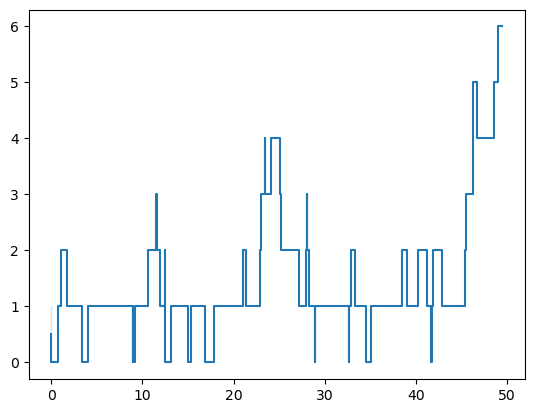

In [3]:
res = simul_file(0.5)
x_values, y_values = zip(*res)
sns.lineplot(x=x_values, y=y_values, drawstyle='steps-pre')

La fonction ```simul_file_2(lam)``` qui suit reprend le code de la fonction précédente. Modifier ce qu'il faut pour afficher dans un graphique l'évolution au cours du temps du **nombre moyen de clients**.

nb moyen de clients: [9999.912944432637, 44.21585625812315]


<Axes: >

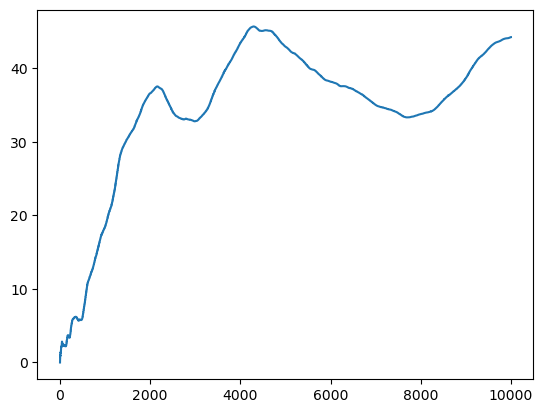

In [45]:
# les constantes
T_MAX = 10000 # temps max de simulation

def simul_file2(lam):
    """ simule la file d'attente en fonction du taux d'arrivée lam
    retourne les statistiques mesurées"""

    # les variables
    t = 0 # temps
    n = 0 # nombre de clients à chaque date
    echeancier = [] # contient les événements à venir
    # On initialise l'échéancier en ajoutant un client
    heappush(echeancier, (0,"client"))
    # evolution du nombre de clients au cours du temps
    n_t = []
    # nombre de clients cumulés
    n_cumul = 0
    
    # boucle principale
    while t < T_MAX:
        # on récupère les données à afficher
        n_t.append([t, n_cumul / (t+1)])
        # on extrait l'événement le plus proche dans le temps
        evt = heappop(echeancier)
        # on traite l'événement
        n_cumul += n * (evt[0] - t)
        # on met à jour la date
        t = evt[0]
        match evt[1]:
            case "service":
                # un client part
                n -= 1
                # si il reste un client, il commence son service
                if n > 0:
                    heappush(echeancier, (t + duree_exp(1), "service"))
            case "client":
                # on calcule la date d'arrivée du prochain client
                heappush(echeancier, (t + duree_exp(lam), "client"))
                n += 1
                # si la file était vide, on commence un service
                if n == 1:
                    heappush(echeancier, (t + duree_exp(1), "service"))
                    
    # on retourne les statistiques mesurées 
    return n_t
res = simul_file2(1)
print("nb moyen de clients:", res[-1])
x_values, y_values = zip(*res)
sns.lineplot(x=x_values, y=y_values, drawstyle='steps-pre')

* augmenter le temps de simulation; quelle valeur choisir pour avoir une bonne estimation du nombre moyen de clients théorique?

* même question mais en changeant la valeur du paramètre $\lambda$. Vous choisirez les valeurs $0.9$, $0.99$, $1$ et $2$. Que constatez-vous?

* proposer un critère d'arrêt automatique de la simulation et l'implémenter dans le code.

* afficher le nombre moyen de clients en fonction de $\lambda$ pour différentes valeurs choisies entre $0.5$ et $0.95$. Vous pouvez utiliser la cellule de code qui suit.

---
## 2. D'autres mesures

On reprend le modèle de la file d'attente de l'exercice précédent. Maintenant, la file a une *capacité finie* de $C$ clients (sans tenir compte du client dans le serveur). Quand un client arrive et que la file est pleine, ce client est déclaré *perdu*. Ecrire un simulateur à événements discrets qui permettent d'estimer les valeurs suivantes:

* le taux d'activité du serveur

* le nombre moyen de clients dans le système (file et serveur)

* le taux de rejet des clients

* la probabilité que la file soit pleine

* le temps moyen passé dans le système par les clients

* le taux de sortie des clients du serveur  

Vous testerez votre simulateur pour différentes valeurs de $\lambda$.



In [48]:
# les constantes
T_MAX = 10000 # temps max de simulation
C = 10 # capacité de la file

def simul_file3(lam):
    """ simule la file d'attente en fonction du taux d'arrivée lam
    retourne les statistiques mesurées"""

    # les variables
    t = 0 # temps
    n = 0 # nombre de clients à chaque date
    t_actif = 0
    n_rejet = 0
    n_arrive = 0
    t_plein = 0
    n_sorti = 0
    echeancier = [] # contient les événements à venir
    # On initialise l'échéancier en ajoutant un client
    heappush(echeancier, (0,"client"))
    # evolution du nombre de clients au cours du temps
    n_t = []
    # nombre de clients cumulés
    n_cumul = 0
    
    # boucle principale
    while t < T_MAX:
        # on extrait l'événement le plus proche dans le temps
        evt = heappop(echeancier)
        # on traite l'événement
        n_cumul += n * (evt[0] - t)
        if(n>0): # le serveur était actif
            t_actif += evt[0] - t
        if(n == C): # la file était remplie
            t_plein += evt[0] - t
        
        # on met à jour la date
        t = evt[0]
        match evt[1]:
            case "service":
                n_sorti += 1
                # un client part
                n -= 1
                # si il reste un client, il commence son service
                if n > 0:
                    heappush(echeancier, (t + duree_exp(1), "service"))
            case "client":
                n_arrive += 1
                # on calcule la date d'arrivée du prochain client
                heappush(echeancier, (t + duree_exp(lam), "client"))
                if(n < C):
                    n += 1
                else:
                    n_rejet += 1
            
                # si la file était vide, on commence un service
                if n == 1:
                    heappush(echeancier, (t + duree_exp(1), "service"))
                    
    # on affiche les statistiques mesurées
    printf("taux d'activité serveur:", t_actif / T_MAX)
    printf("taux de rejet:", n_rejet / n_arrive)
    printf("proba file pleine:", t_plein / T_MAX)
    printf("nb moyen clients:", n_cumul / T_MAX)
    printf("temps moyen de séjour:", n_cumul / T_MAX / lam)
    printf("taux de service:", n_sorti / T_MAX) 
    
simul_file3(0.5)


NameError: name 'printf' is not defined

---

## 3. Deux files pour changer


On a deux files l'une derrière l'autre. Quand un client a fini son service dans la file 1 il rentre dans la file 2. La file 1
est de capacité infinie, la file 2 est de capacité finie $C$. Si la file 2 est pleine et qu'un client de la file 1 a terminé son
service, ce client reste bloqué dans la file 1 en attendant que la file 2 ne soit plus pleine. Pendant ce temps aucun service
ne peut avoir lieu dans la file 1.

Ecrire un simulateur à événements discrets qui permettent d'estimer:

* la probabilité que la file 1 soit bloquée par la file 2

* le temps moyen de séjour d'un client dans le système avant d'en sortir





---

## 4. Retour à une seule file





On considère une file d'attente de capacité finie $C$ et deux types de clients:

* type 1 : prioritaire en service

* type 2 : prioritaire en espace


Quand un service se termine, si dans la file, il y a des clients de type 1 et de type 2,
c'est un client de type 1 qui commence le service. S'il n'y a pas de clients de type 1,
c'est un client de type 2.


Si la file est pleine (il y a $C$ clients dans la file):

* Si un client de type 1 arrive il est rejeté. 

* Si c'est un client de type 2 qui arrive et qu'il y a des clients de
type 1 dans la file, le client de type 2 remplace le dernier client de type 1 qui est arrivé.

* Si c'est un client de type 2 qui arrive et qu'il n'y a pas de client de type 1 dans la file,
le client de type 2 est rejeté.


Ecrire un simulateur à événements discrets qui permettent d'estimer les valeurs suivantes:

* la probabilité qu'un client de type 1 soit rejeté de la file en étant remplacé dans la file par un client de type 2

* la probabilité qu'un client de type 2 soit rejeté

* le temps moyen passé dans la file par les clients de type 1 et par les clients de type 2
